In [5]:
import pickle

import humanize
import numpy as np
import pandas as pd
from datetime import datetime

%matplotlib inline
%load_ext autoreload

In [2]:
final_features = pd.read_csv('./final_features.csv', header=0, index_col=0)
outcomes = pd.read_csv('./labels.csv', header=None, index_col=0)[1]

In [3]:
col_names = np.append(final_features.columns.values, 'outcome')
col_names

array(['driver_age_raw', 'search_conducted', 'contraband_found', 'is_male',
       'violation_cell_phone', 'violation_display_of_plates',
       'violation_equipment', 'violation_incomplete_stop',
       'violation_license', 'violation_lights',
       'violation_moving_violation', 'violation_other',
       'violation_registration', 'violation_safe_movement',
       'violation_seatbelt', 'violation_speeding',
       'violation_suspended_license', 'violation_traffic_control_signal',
       'violation_window_tint', 'county_name_Fairfield County',
       'county_name_Hartford County', 'county_name_Litchfield County',
       'county_name_Middlesex County', 'county_name_New Haven County',
       'county_name_New London County', 'county_name_Tolland County',
       'county_name_Windham County', 'driver_race_Asian',
       'driver_race_Black', 'driver_race_Hispanic', 'driver_race_Other',
       'driver_race_White', 'stop_duration_1-15 min',
       'stop_duration_16-30 min', 'stop_duration_30+ 

In [4]:
final_features['outcomes'] = outcomes
final_features

,driver_age_raw,search_conducted,contraband_found,is_male,violation_cell_phone,violation_display_of_plates,violation_equipment,violation_incomplete_stop,violation_license,violation_lights,...,stop_duration_30+ min,day_period_Afternoon,day_period_Evening,day_period_Morning,day_period_Small Hours,season_Fall,season_Spring,season_Summer,season_Winter,outcomes
0,0.696970,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
1,0.202020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Verbal Warning
2,0.343434,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
3,0.464646,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Written Warning
4,0.303030,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
5,0.252525,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,Verbal Warning
6,0.272727,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
7,0.484848,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Verbal Warning
8,0.252525,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Ticket
9,0.323232,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,Verbal Warning


In [5]:
final_features.shape

(313274, 44)

In [6]:
final_features.drop_duplicates(inplace=True)

In [7]:
final_features.shape

(185698, 44)

In [8]:
arrest = final_features.loc[final_features['outcomes'] == 'Arrest']
summons = final_features.loc[final_features['outcomes'] == 'Summons']
ww = final_features.loc[final_features['outcomes'] == 'Written Warning']
vw = final_features.loc[final_features['outcomes'] == 'Verbal Warning']

In [9]:
oversampled = final_features.append([arrest] * 10, ignore_index=True)
oversampled = oversampled.append([summons] * 9, ignore_index=True)
oversampled = oversampled.append([ww] * 5, ignore_index=True)
oversampled = oversampled.append([vw] * 3, ignore_index=True)
oversampled.shape

(587397, 44)

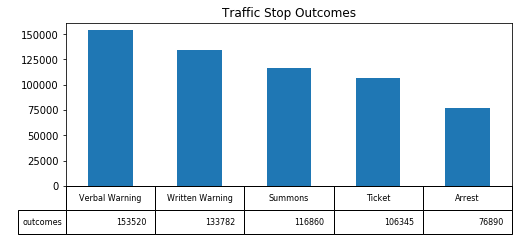

In [10]:
outcome_breakdown = oversampled['outcomes'].value_counts().plot.bar(figsize=(8, 3), title='Traffic Stop Outcomes', table=True)
outcome_breakdown.axes.get_xaxis().set_visible(False)
outcome_breakdown.tables[0].scale(1, 2)

In [11]:
oversampled_outcomes = oversampled.pop('outcomes')

In [12]:
oversampled_outcomes[:10]

0             Ticket
1     Verbal Warning
2             Ticket
3    Written Warning
4             Ticket
5     Verbal Warning
6             Ticket
7     Verbal Warning
8             Ticket
9     Verbal Warning
Name: outcomes, dtype: object

In [13]:
oversampled[:10]

,driver_age_raw,search_conducted,contraband_found,is_male,violation_cell_phone,violation_display_of_plates,violation_equipment,violation_incomplete_stop,violation_license,violation_lights,...,stop_duration_16-30 min,stop_duration_30+ min,day_period_Afternoon,day_period_Evening,day_period_Morning,day_period_Small Hours,season_Fall,season_Spring,season_Summer,season_Winter
0,0.696970,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0.202020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0.343434,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0.464646,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0.303030,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
5,0.252525,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
6,0.272727,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7,0.484848,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
8,0.252525,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
9,0.323232,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [14]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(oversampled, 
                                                    oversampled_outcomes, 
                                                    test_size=0.2, 
                                                    random_state=0)


/home/pato/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
import xgboost as xgb

In [16]:
codes = {
    'Ticket': 1,
    'Arrest': 2,
    'Summons': 3,
    'Verbal Warning': 4,
    'Written Warning': 5,
}

def labels_to_ints(label):
    return codes[label]

In [17]:
xg_train = xgb.DMatrix(X_train.values, label=y_train.apply(labels_to_ints).values)
xg_test = xgb.DMatrix(X_test.values, label=y_test.apply(labels_to_ints).values)

In [ ]:
params = {
    'objective': 'multi:softmax',
    'learning_rate': .0983,
    'max_depth': 8,
    'silent': 0,
    'nthread': 8,
    'num_class': 43,
#     'predictor': 'gpu_predictor',
#     'max_bin': 512,
    'tree_method': 'gpu_hist',
#     'alpha': 0.8,
#     'gamma': 10.0,
    'subsample': 0.6,
#     'lambda': 0.9,,
#     'colsample_bytree': 0.9,
#     'colsample_bylevel': 0.3,
#     'scale_pos_weight': 0.1,
#     'updater': 'grow_histmaker,refresh,prune',
#     'grow_policy': 'lossguide',
#     'max_leaves': 20000,
#     'max_bin': 1024,
#     'base_score': 1.0,
#     'eval_metric': 'ndcg',
#     'max_delta_step': 8,
}

In [ ]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 100
num_round = 5
bst = xgb.train(params, xg_train, num_round, watchlist)
pred = bst.predict(xg_test)

In [ ]:
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

In [ ]:
np.savetxt('oversampled_deduped/pred-{}.txt'.format(timestamp), pred)

In [ ]:
error_rate = np.sum(pred != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

## My own grid search

In [19]:
params = {
    'objective': 'multi:softmax',
    'learning_rate': .03,
    'max_depth': 19,
    'silent': 0,
    'nthread': 8,
    'num_class': 43,
#     'predictor': 'gpu_predictor',
#     'max_bin': 512,
    'tree_method': 'gpu_hist',
#     'alpha': 0.8,
#     'gamma': 10.0,
    'subsample': 0.6,
#     'lambda': 0.9,,
#     'colsample_bytree': 0.9,
#     'colsample_bylevel': 0.3,
#     'scale_pos_weight': 0.1,
#     'updater': 'grow_histmaker,refresh,prune',
#     'grow_policy': 'lossguide',
#     'max_leaves': 20000,
#     'max_bin': 1024,
#     'base_score': 1.0,
#     'eval_metric': 'ndcg',
#     'max_delta_step': 8,
}

In [20]:
# max_depths = [19]
# num_classes = [43]
# subsamples = [0.9]
# learning_rates = [0.09825, 0.0983, 0.09835]

# Uncomment on first run
# best_params = {
#     'error_rate': 1,
#     'learning_rate': .03,
# }

# for learning_rate in learning_rates:
#     params['learning_rate'] = learning_rate
#     print('\nlearning_rate: {}'.format(learning_rate))
    # params['max_depth'] = depth
    # print('\nmax_depth: {}'.format(depth))
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 100
num_round = 2000

bst = xgb.train(params, xg_train, num_round, watchlist)
pred = bst.predict(xg_test)
error_rate = np.sum(pred != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))
# if error_rate < best_params['error_rate']:
#     best_params['error_rate'] = error_rate
#     best_params['learning_rate'] = learning_rate

# print('Best params:  {}'.format(best_params))

[0]	train-merror:0.48831	test-merror:0.496008
[1]	train-merror:0.47848	test-merror:0.48816
[2]	train-merror:0.470679	test-merror:0.481222
[3]	train-merror:0.464618	test-merror:0.476098
[4]	train-merror:0.459749	test-merror:0.471868
[5]	train-merror:0.453993	test-merror:0.467646
[6]	train-merror:0.448894	test-merror:0.463773
[7]	train-merror:0.444074	test-merror:0.460223
[8]	train-merror:0.439348	test-merror:0.457022
[9]	train-merror:0.433806	test-merror:0.452937
[10]	train-merror:0.430382	test-merror:0.45034
[11]	train-merror:0.426062	test-merror:0.446927
[12]	train-merror:0.421168	test-merror:0.443497
[13]	train-merror:0.417029	test-merror:0.43982
[14]	train-merror:0.412171	test-merror:0.436304
[15]	train-merror:0.408596	test-merror:0.433291
[16]	train-merror:0.405355	test-merror:0.431682
[17]	train-merror:0.401467	test-merror:0.428899
[18]	train-merror:0.39747	test-merror:0.426319
[19]	train-merror:0.393755	test-merror:0.423817
[20]	train-merror:0.389524	test-merror:0.420548
[21]	tra

[171]	train-merror:0.198531	test-merror:0.265305
[172]	train-merror:0.197871	test-merror:0.264624
[173]	train-merror:0.197482	test-merror:0.26436
[174]	train-merror:0.196826	test-merror:0.263824
[175]	train-merror:0.196009	test-merror:0.263219
[176]	train-merror:0.195413	test-merror:0.262479
[177]	train-merror:0.194766	test-merror:0.261968
[178]	train-merror:0.193811	test-merror:0.261006
[179]	train-merror:0.193277	test-merror:0.260495
[180]	train-merror:0.192557	test-merror:0.259695
[181]	train-merror:0.192023	test-merror:0.259338
[182]	train-merror:0.191366	test-merror:0.258708
[183]	train-merror:0.190795	test-merror:0.257831
[184]	train-merror:0.190053	test-merror:0.257363
[185]	train-merror:0.189297	test-merror:0.256597
[186]	train-merror:0.188659	test-merror:0.256239
[187]	train-merror:0.188072	test-merror:0.255856
[188]	train-merror:0.187405	test-merror:0.255252
[189]	train-merror:0.18669	test-merror:0.254792
[190]	train-merror:0.186071	test-merror:0.254103
[191]	train-merror:0.1

[339]	train-merror:0.139091	test-merror:0.209857
[340]	train-merror:0.138899	test-merror:0.209704
[341]	train-merror:0.13872	test-merror:0.209687
[342]	train-merror:0.138607	test-merror:0.209508
[343]	train-merror:0.138469	test-merror:0.209287
[344]	train-merror:0.138333	test-merror:0.20921
[345]	train-merror:0.138175	test-merror:0.208938
[346]	train-merror:0.138031	test-merror:0.208878
[347]	train-merror:0.137926	test-merror:0.208776
[348]	train-merror:0.137818	test-merror:0.20875
[349]	train-merror:0.137573	test-merror:0.208529
[350]	train-merror:0.137456	test-merror:0.208282
[351]	train-merror:0.137316	test-merror:0.208197
[352]	train-merror:0.137137	test-merror:0.208027
[353]	train-merror:0.136982	test-merror:0.208035
[354]	train-merror:0.136854	test-merror:0.207823
[355]	train-merror:0.136682	test-merror:0.207661
[356]	train-merror:0.136582	test-merror:0.207508
[357]	train-merror:0.136467	test-merror:0.20761
[358]	train-merror:0.13636	test-merror:0.207388
[359]	train-merror:0.1362

[508]	train-merror:0.124973	test-merror:0.194484
[509]	train-merror:0.124903	test-merror:0.194544
[510]	train-merror:0.124877	test-merror:0.194518
[511]	train-merror:0.12486	test-merror:0.194374
[512]	train-merror:0.124822	test-merror:0.194552
[513]	train-merror:0.124782	test-merror:0.194476
[514]	train-merror:0.124777	test-merror:0.194578
[515]	train-merror:0.12475	test-merror:0.194399
[516]	train-merror:0.124724	test-merror:0.194391
[517]	train-merror:0.124679	test-merror:0.194297
[518]	train-merror:0.124669	test-merror:0.194254
[519]	train-merror:0.124628	test-merror:0.19422
[520]	train-merror:0.124588	test-merror:0.194229
[521]	train-merror:0.124539	test-merror:0.194118
[522]	train-merror:0.124484	test-merror:0.194059
[523]	train-merror:0.124439	test-merror:0.193973
[524]	train-merror:0.124409	test-merror:0.193956
[525]	train-merror:0.124356	test-merror:0.193939
[526]	train-merror:0.124294	test-merror:0.193837
[527]	train-merror:0.124241	test-merror:0.193744
[528]	train-merror:0.12

[677]	train-merror:0.120723	test-merror:0.188662
[678]	train-merror:0.120728	test-merror:0.188696
[679]	train-merror:0.120726	test-merror:0.188653
[680]	train-merror:0.120692	test-merror:0.1885
[681]	train-merror:0.120677	test-merror:0.188687
[682]	train-merror:0.120655	test-merror:0.188424
[683]	train-merror:0.120653	test-merror:0.188577
[684]	train-merror:0.12064	test-merror:0.188364
[685]	train-merror:0.120589	test-merror:0.188202
[686]	train-merror:0.120589	test-merror:0.188262
[687]	train-merror:0.120545	test-merror:0.1881
[688]	train-merror:0.120523	test-merror:0.188219
[689]	train-merror:0.120498	test-merror:0.188058
[690]	train-merror:0.120489	test-merror:0.188109
[691]	train-merror:0.120481	test-merror:0.187904
[692]	train-merror:0.120479	test-merror:0.188143
[693]	train-merror:0.120483	test-merror:0.188143
[694]	train-merror:0.12046	test-merror:0.188049
[695]	train-merror:0.120443	test-merror:0.187887
[696]	train-merror:0.12043	test-merror:0.187853
[697]	train-merror:0.120415

[846]	train-merror:0.119268	test-merror:0.186091
[847]	train-merror:0.119272	test-merror:0.186057
[848]	train-merror:0.119249	test-merror:0.186057
[849]	train-merror:0.119242	test-merror:0.186185
[850]	train-merror:0.119242	test-merror:0.186125
[851]	train-merror:0.119244	test-merror:0.186261
[852]	train-merror:0.119225	test-merror:0.186176
[853]	train-merror:0.119223	test-merror:0.186253
[854]	train-merror:0.119215	test-merror:0.185972
[855]	train-merror:0.119206	test-merror:0.18581
[856]	train-merror:0.1192	test-merror:0.185921
[857]	train-merror:0.119191	test-merror:0.185972
[858]	train-merror:0.119185	test-merror:0.185887
[859]	train-merror:0.119181	test-merror:0.18604
[860]	train-merror:0.119176	test-merror:0.186023
[861]	train-merror:0.11917	test-merror:0.185878
[862]	train-merror:0.119172	test-merror:0.186032
[863]	train-merror:0.119166	test-merror:0.185981
[864]	train-merror:0.119159	test-merror:0.186134
[865]	train-merror:0.119151	test-merror:0.186134
[866]	train-merror:0.1191

[1015]	train-merror:0.118776	test-merror:0.185027
[1016]	train-merror:0.118778	test-merror:0.185112
[1017]	train-merror:0.118778	test-merror:0.18507
[1018]	train-merror:0.118774	test-merror:0.185053
[1019]	train-merror:0.118776	test-merror:0.184985
[1020]	train-merror:0.118774	test-merror:0.184806
[1021]	train-merror:0.118778	test-merror:0.184661
[1022]	train-merror:0.118776	test-merror:0.184917
[1023]	train-merror:0.118776	test-merror:0.184917
[1024]	train-merror:0.118776	test-merror:0.184976
[1025]	train-merror:0.118768	test-merror:0.184959
[1026]	train-merror:0.11877	test-merror:0.184908
[1027]	train-merror:0.118774	test-merror:0.184746
[1028]	train-merror:0.118774	test-merror:0.184831
[1029]	train-merror:0.118768	test-merror:0.184917
[1030]	train-merror:0.118766	test-merror:0.184866
[1031]	train-merror:0.118766	test-merror:0.184857
[1032]	train-merror:0.118764	test-merror:0.184797
[1033]	train-merror:0.118761	test-merror:0.184917
[1034]	train-merror:0.118757	test-merror:0.184993
[1

[1180]	train-merror:0.118664	test-merror:0.184261
[1181]	train-merror:0.118661	test-merror:0.184389
[1182]	train-merror:0.118655	test-merror:0.184278
[1183]	train-merror:0.118655	test-merror:0.184423
[1184]	train-merror:0.118655	test-merror:0.184099
[1185]	train-merror:0.118655	test-merror:0.183878
[1186]	train-merror:0.118655	test-merror:0.184202
[1187]	train-merror:0.118655	test-merror:0.184202
[1188]	train-merror:0.118655	test-merror:0.184031
[1189]	train-merror:0.118655	test-merror:0.18404
[1190]	train-merror:0.118655	test-merror:0.183938
[1191]	train-merror:0.118655	test-merror:0.183861
[1192]	train-merror:0.118655	test-merror:0.184082
[1193]	train-merror:0.118655	test-merror:0.184006
[1194]	train-merror:0.118649	test-merror:0.183946
[1195]	train-merror:0.118651	test-merror:0.183938
[1196]	train-merror:0.118651	test-merror:0.183767
[1197]	train-merror:0.118651	test-merror:0.18364
[1198]	train-merror:0.118653	test-merror:0.183895
[1199]	train-merror:0.118655	test-merror:0.183887
[1

[1345]	train-merror:0.118636	test-merror:0.183529
[1346]	train-merror:0.118636	test-merror:0.183691
[1347]	train-merror:0.118636	test-merror:0.183538
[1348]	train-merror:0.118636	test-merror:0.183708
[1349]	train-merror:0.118636	test-merror:0.183708
[1350]	train-merror:0.118636	test-merror:0.183589
[1351]	train-merror:0.118636	test-merror:0.183589
[1352]	train-merror:0.118636	test-merror:0.183606
[1353]	train-merror:0.118636	test-merror:0.183572
[1354]	train-merror:0.118636	test-merror:0.183648
[1355]	train-merror:0.118636	test-merror:0.183699
[1356]	train-merror:0.118636	test-merror:0.183699
[1357]	train-merror:0.118636	test-merror:0.183725
[1358]	train-merror:0.118636	test-merror:0.18364
[1359]	train-merror:0.118634	test-merror:0.183674
[1360]	train-merror:0.118634	test-merror:0.183521
[1361]	train-merror:0.118634	test-merror:0.183401
[1362]	train-merror:0.118634	test-merror:0.183495
[1363]	train-merror:0.118634	test-merror:0.183614
[1364]	train-merror:0.118634	test-merror:0.18364
[1

[1510]	train-merror:0.118621	test-merror:0.182772
[1511]	train-merror:0.118621	test-merror:0.182823
[1512]	train-merror:0.118621	test-merror:0.182755
[1513]	train-merror:0.118621	test-merror:0.182763
[1514]	train-merror:0.118621	test-merror:0.182882
[1515]	train-merror:0.118621	test-merror:0.182848
[1516]	train-merror:0.118621	test-merror:0.182669
[1517]	train-merror:0.118621	test-merror:0.182755
[1518]	train-merror:0.118621	test-merror:0.182695
[1519]	train-merror:0.118621	test-merror:0.182763
[1520]	train-merror:0.118621	test-merror:0.182678
[1521]	train-merror:0.118621	test-merror:0.182712
[1522]	train-merror:0.118621	test-merror:0.182601
[1523]	train-merror:0.118621	test-merror:0.18261
[1524]	train-merror:0.118621	test-merror:0.182661
[1525]	train-merror:0.118621	test-merror:0.182644
[1526]	train-merror:0.118621	test-merror:0.182729
[1527]	train-merror:0.118621	test-merror:0.18278
[1528]	train-merror:0.118621	test-merror:0.182806
[1529]	train-merror:0.118621	test-merror:0.182908
[1

[1675]	train-merror:0.118621	test-merror:0.182746
[1676]	train-merror:0.118621	test-merror:0.182635
[1677]	train-merror:0.118619	test-merror:0.182737
[1678]	train-merror:0.118619	test-merror:0.18255
[1679]	train-merror:0.118619	test-merror:0.18278
[1680]	train-merror:0.118619	test-merror:0.182814
[1681]	train-merror:0.118619	test-merror:0.18301
[1682]	train-merror:0.118619	test-merror:0.182755
[1683]	train-merror:0.118619	test-merror:0.18295
[1684]	train-merror:0.118619	test-merror:0.182942
[1685]	train-merror:0.118619	test-merror:0.183052
[1686]	train-merror:0.118619	test-merror:0.183001
[1687]	train-merror:0.118619	test-merror:0.183001
[1688]	train-merror:0.118619	test-merror:0.183069
[1689]	train-merror:0.118619	test-merror:0.182899
[1690]	train-merror:0.118623	test-merror:0.182865
[1691]	train-merror:0.118619	test-merror:0.182967
[1692]	train-merror:0.118623	test-merror:0.18295
[1693]	train-merror:0.118623	test-merror:0.182593
[1694]	train-merror:0.118623	test-merror:0.182567
[1695

[1840]	train-merror:0.118621	test-merror:0.182635
[1841]	train-merror:0.118621	test-merror:0.182661
[1842]	train-merror:0.118621	test-merror:0.182542
[1843]	train-merror:0.118621	test-merror:0.182533
[1844]	train-merror:0.118621	test-merror:0.182406
[1845]	train-merror:0.118621	test-merror:0.182627
[1846]	train-merror:0.118621	test-merror:0.182482
[1847]	train-merror:0.118621	test-merror:0.182567
[1848]	train-merror:0.118621	test-merror:0.182618
[1849]	train-merror:0.118621	test-merror:0.182576
[1850]	train-merror:0.118621	test-merror:0.182491
[1851]	train-merror:0.118621	test-merror:0.182559
[1852]	train-merror:0.118621	test-merror:0.182397
[1853]	train-merror:0.118621	test-merror:0.182278
[1854]	train-merror:0.118621	test-merror:0.182193
[1855]	train-merror:0.118621	test-merror:0.182261
[1856]	train-merror:0.118621	test-merror:0.182218
[1857]	train-merror:0.118621	test-merror:0.182354
[1858]	train-merror:0.118621	test-merror:0.182218
[1859]	train-merror:0.118621	test-merror:0.182252


In [21]:
error_rate = np.sum(pred != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

Test error using softmax = 0.1826268300987402


In [1]:
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

In [2]:
bst.save_model('./oversampled_deduped/{}-xgb_model-1K-saved.model'.format(timestamp))

NameError: name 'bst' is not defined

In [ ]:
bst.dump_model('./oversampled_deduped/{}-xgb_model-1K-dumped.txt'.format(timestamp))
xg_train.save_binary('./oversampled_deduped/{}-xg_train.buffer'.format(timestamp))
xg_test.save_binary('./oversampled_deduped/{}-xg_test.buffer'.format(timestamp))
X_train.to_csv('./oversampled_deduped/{}-X_train.csv'.format(timestamp))
y_train.to_csv('./oversampled_deduped/{}-y_train.csv'.format(timestamp))

### Reload model and resume training

In [ ]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
loaded = xgb.Booster({'nthread': 8})
loaded.load_model('oversampled_deduped/xgb_model-1K-saved-20180505093413.model')
num_round = 1000

loaded = xgb.train(params, xg_train, num_round, watchlist, xgb_model=loaded)
pred_loaded = bst.predict(xg_test)
error_rate = np.sum(pred_loaded != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

### xgboost.cv Test

In [ ]:
cvd = xgb.cv(params, xg_train, nfold=5)

In [ ]:
cvd

# RUN BELOW MANUALLY

## GridSearchCV

In [ ]:
from sklearn.cross_validation import *
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold

kwargs = {
    'tree_method': ['gpu_hist'],
}

xgb_model = xgb.XGBClassifier(kwargs)

parameters = {
    'objective': ['multi:softmax'],
    'learning_rate': [.05],
    'max_depth': [6, 7, 8],
#     'max_depth': [2],
    'silent': [0],
    'nthread': [7],
#     'n_estimators': [5],
    'n_estimators': [5],
#     'num_class': 43,
#     'predictor': ['gpu_predictor'],
#     'max_bin': 512,
#     'tree_method': ['gpu_hist'],
#     'alpha': 0.8,
#     'gamma': 10.0,
    'subsample': [0.6],
    'seed': [0],
#     'lambda': 0.9,,
#     'colsample_bytree': 0.9,
#     'colsample_bylevel': 0.3,
#     'scale_pos_weight': 0.1,
#     'updater': 'grow_histmaker,refresh,prune',
#     'grow_policy': 'lossguide',
#     'max_leaves': 20000,
#     'max_bin': 1024,
#     'base_score': 1.0,
#     'eval_metric': 'ndcg',
#     'max_delta_step': 8,
}

# clf = GridSearchCV(xgb_model, parameters, n_jobs=1, 
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
#                    cv=StratifiedKFold(random_state=0, n_splits=5, shuffle=True), 
#                    cv=xgb.cv(parameters, xg_train, nfold=5),
                   scoring='accuracy',
                   verbose=2, refit=True)

In [ ]:
# xgb_model.get_params().keys()

In [ ]:
clf.fit(X_train.values, y_train.apply(labels_to_ints).values)

#trust your CV!
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw accuracy score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
bst.save_model('oversampled_deduped/xgb_model-saved-{}.model'.format(timestamp))
bst.dump_model('oversampled_deduped/xgb_model_dumped-{}.txt'.format(timestamp))

In [ ]:
from sklearn.externals import joblib

joblib.dump(bst, "oversampled_deduped/xgb_model_{}.joblib.dat".format(timestamp))


In [ ]:
bst.save_model('./oversampled_deduped/xgb_model_test_001-saved.model')

In [ ]:
bst.dump_model('./oversampled_deduped/xgb_model_test_001-dumped.txt')

In [ ]:
ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(15, 10)

In [ ]:
print('f0:\t{}'.format(col_names[0]))
print('f3:\t{}'.format(col_names[3]))
print('f30:\t{}'.format(col_names[30]))


In [ ]:
xgb.plot_tree(bst, num_trees=2)

In [ ]:
xgb.to_graphviz(bst, num_trees=2)

In [ ]:
import pickle

In [ ]:
from datetime import datetime

pickle.dump(bst, open('./xgb_model_5k.pickle.{}.dat'.format(datetime.now().strftime('%Y%m%d%H%M%S')), 'wb'))

### Plot results

In [6]:
error_results = {
    'train': [],
    'test': [],
}

with open('oversampled_deduped/xgboost-2k_run-05051947.log', 'r') as f:
    for line in f:
        tokens = line.strip().split('\t')
        error_results['train'].append(float(tokens[1].split(':')[1]))
        error_results['test'].append(float(tokens[2].split(':')[1]))

df_errors = pd.DataFrame(error_results)

Text(0,0.5,'Error')

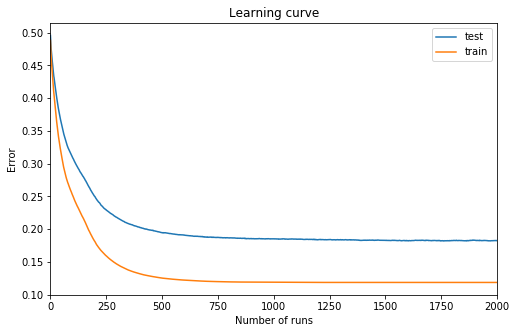

In [7]:
learning_curve = df_errors.plot.line(title='Learning curve', figsize=(8,5))
learning_curve.set_xlabel('Number of runs')
learning_curve.set_ylabel('Error')


In [10]:
type(error_results['test'])

list

In [16]:
df_accuracy = df_errors.copy()
df_accuracy_processed = df_accuracy.mul(-1).add(1)

Text(0,0.5,'Error')

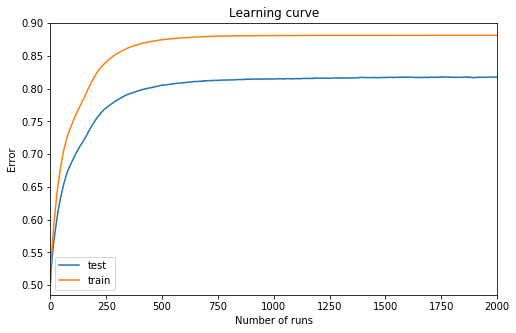

In [17]:
learning_curve = df_accuracy_processed.plot.line(title='Learning curve', figsize=(8,5))
learning_curve.set_xlabel('Number of runs')
learning_curve.set_ylabel('Error')


# Load saved model and resume training

In [ ]:
# watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 1000

# loaded = pickle.load(open('./xgb_model_5k.pickle.dat', 'rb'))
# bst_continued = xgb.train(params, xg_train, num_round, watchlist, xgb_model=loaded)
# pred_continued = bst_continued.predict(xg_test)

In [ ]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
# num_round = 5000
num_round = 50

loaded = xgb.Booster({'nthread': 8})
loaded.load_model('saved.model')
# loaded.load_model('xgb_model-saved-20180430174133.model')
# loaded.load_model('./xgb_model-dumped-20180430174133.model')
# loaded.load_model('./xgb_model_test_001-saved.model')

In [ ]:
bst_continued = xgb.train(params, xg_train, num_round, watchlist, xgb_model=loaded)
pred_continued = bst_continued.predict(xg_test)

In [ ]:
error_rate = np.sum(pred_continued != y_test.apply(labels_to_ints)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

In [ ]:
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
bst_continued.save_model('./oversampled_deduped/xgb_model-1K-saved-{}.model'.format(timestamp))
bst_continued.dump_model('./oversampled_deduped/xgb_model-1K-dumped-{}.txt'.format(timestamp))